## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [96]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [97]:
study_combo = pd.merge(mouse_metadata, study_results, on='Mouse ID')
study_combo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# Checking the number of mice in the DataFrame.
total_mice = study_combo.shape[0]
total_mice

1893

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_study_data = study_combo[study_combo.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_combo.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [102]:
duplicate_study_data2 = clean_study_data[clean_study_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_study_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [103]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_study_data.shape[0]
total_mice_clean

1888

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(clean_study_data['Drug Regimen'].unique(), sep = '\n')
# This method is the most straightforward, creating multiple series and putting them all together at the end.

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [130]:
mean_df = clean_study_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).mean()


In [106]:
median_df = clean_study_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).median()

In [107]:
var_df = clean_study_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).var()

In [108]:
std_df = clean_study_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).std()

In [109]:
sem_df = clean_study_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).sem()

In [110]:
stat_data = pd.merge(mean_df, median_df, on='Drug Regimen')


In [111]:
stat_data.rename(columns = {'Tumor Volume (mm3)_x':'Mean'}, inplace = True)
stat_data.rename(columns = {'Tumor Volume (mm3)_y':'Median'}, inplace = True)


In [112]:
stat_data = pd.merge(stat_data, var_df, on='Drug Regimen')
stat_data.rename(columns = {'Tumor Volume (mm3)':'Variance'}, inplace = True)


In [113]:
stat_data = pd.merge(stat_data, std_df, on='Drug Regimen')
stat_data.rename(columns = {'Tumor Volume (mm3)':'Standard Deviation'}, inplace = True)


In [114]:
stat_data = pd.merge(stat_data, sem_df, on='Drug Regimen')
stat_data.rename(columns = {'Tumor Volume (mm3)':'Standard Error of Mean'}, inplace = True)
stat_data

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [115]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_timepoint_df = clean_study_data['Timepoint'].value_counts()
mice_timepoint_df

0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [116]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
Timepoint = ['0','5','10','15','20','25','30','35','40','45']
mouse_number = [249,237,222,206,194,183,171,154,142,130]
x_axis = np.arange(len(mouse_number))

In [117]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Timepoint)
plt.title("Number of mice per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

<BarContainer object of 10 artists>

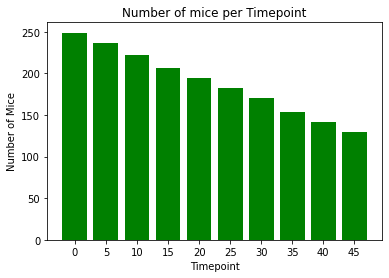

In [118]:
plt.bar(x_axis, mouse_number, color="g", align="center")

## Pie Plots

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = clean_study_data['Sex'].value_counts()
mice_gender_df

Male      958
Female    930
Name: Sex, dtype: int64

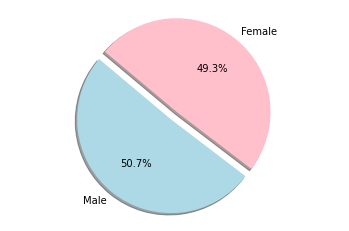

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = ['Male','Female']
sex_count = [958,930]
colors = ['lightblue','pink']
explode = (0.1,0)

plt.pie(sex_count, explode=explode, labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_promising_treatments = mean_df.nsmallest(4, ['Tumor Volume (mm3)'])
most_promising_treatments 

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,40.216745
Capomulin,40.675741
Propriva,52.393463
Ceftamin,52.591172


In [204]:
tumor_sum = clean_study_data.groupby(['Mouse ID', 'Drug Regimen'], as_index=False)['Tumor Volume (mm3)'].sum()
tumor_sum

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,563.127077
1,a251,Infubinol,552.370946
2,a262,Placebo,586.116306
3,a275,Ceftamin,527.709651
4,a366,Stelasyn,382.479341
...,...,...,...
244,z435,Propriva,140.826641
245,z578,Ramicane,384.115100
246,z581,Infubinol,539.795837
247,z795,Naftisol,548.803167


In [207]:
tumor_sum = tumor_sum[~tumor_sum['Drug Regimen'].isin(['Zoniferol','Stelasyn','Placebo','Naftisol','Ketapril','Infubinol'])]
tumor_sum

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
3,a275,Ceftamin,527.709651
6,a411,Ramicane,407.013854
7,a444,Ramicane,430.600524
10,a520,Ramicane,379.892187
12,a644,Ramicane,412.285775
...,...,...,...
239,y769,Ceftamin,562.908873
240,y793,Capomulin,385.068292
241,y865,Ceftamin,549.985586
244,z435,Propriva,140.826641


In [209]:
del tumor_sum['Drug Regimen']
tumor_sum

,Mouse ID,Tumor Volume (mm3)
3,a275,527.709651
6,a411,407.013854
7,a444,430.600524
10,a520,379.892187
12,a644,412.285775
...,...,...
239,y769,562.908873
240,y793,385.068292
241,y865,549.985586
244,z435,140.826641


In [144]:
mouse_regimen = study_combo.drop_duplicates(subset=['Mouse ID'])
mouse_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [203]:
mouse_regimen = mouse_regimen[~mouse_regimen['Drug Regimen'].isin(['Zoniferol','Stelasyn','Placebo','Naftisol','Ketapril','Infubinol'])]
mouse_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1764,x581,Ceftamin,Female,19,28,0,45.0,0
1788,x822,Ceftamin,Male,3,29,0,45.0,0
1836,y769,Ceftamin,Female,6,27,0,45.0,0
1846,y865,Ceftamin,Male,23,26,0,45.0,0


In [213]:
#Total Tumor Size for each Mouse
agg_mouse_sum = pd.merge(mouse_regimen, tumor_sum, on='Mouse ID')
agg_mouse_sum.rename(columns = {'Tumor Volume (mm3)_y':'Total Tumor Size'}, inplace = True)
agg_mouse_sum = agg_mouse_sum[['Mouse ID', 'Drug Regimen', 'Total Tumor Size']].copy()
agg_mouse_sum

,Mouse ID,Drug Regimen,Total Tumor Size
0,k403,Ramicane,323.588589
1,s185,Capomulin,345.591434
2,x401,Capomulin,361.820396
3,m601,Capomulin,348.474699
4,g791,Ramicane,374.892366
...,...,...,...
95,x581,Ceftamin,532.639398
96,x822,Ceftamin,528.489796
97,y769,Ceftamin,562.908873
98,y865,Ceftamin,549.985586


In [211]:
drug_labels = ['Capomulin', 'Ramicane', 'Propriva','Ceftamin']
tumor_data = [vol for vol in agg_mouse_sum['Total Tumor Size']]
plt.boxplot(tumor_data, labels=drug_labels)
plt.ylim(100, 800)
plt.show()

ValueError: Dimensions of labels and X must be compatible

ValueError: Dimensions of labels and X must be compatible

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
